In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

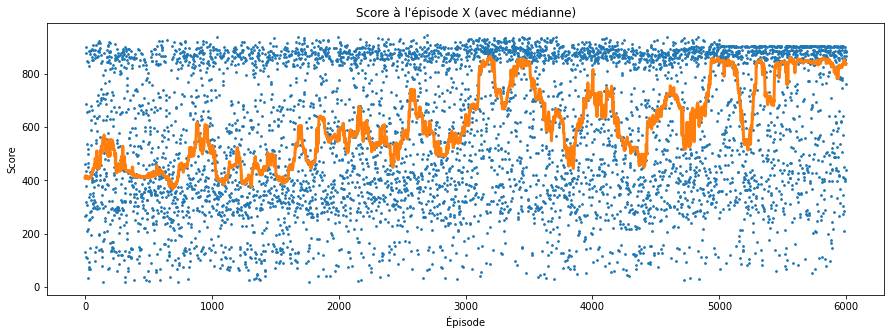

In [51]:
plt.rcParams["figure.figsize"] = (15,5)


def plot(file, fig_name):
    with open(file, 'r') as f:
        scores = json.load(f)["scores"]

    plt.rcParams["figure.figsize"] = (15,5)
    plt.title("Score à l'épisode X (avec médianne)")
    plt.xlabel("Épisode")
    plt.ylabel("Score")
    plt.plot(list(range(len(scores))), scores, 'p', ms=2)


    window = 50
    smoothed_scores = [np.median(scores[max(0, i - window):min(len(scores), i + window)]) for i in range(len(scores))]

    # plt.title("Moving average score at episode X")
    # plt.xlabel("Episode")
    # plt.ylabel("Score")
    plt.plot(list(range(len(smoothed_scores))), smoothed_scores, linewidth=3.0)

    plt.savefig(f'fig/{fig_name}_scores.png')

    plt.show()

def plot_diff(file1, file2, fig_name):
    with open(file1, 'r') as f:
        scores1 = json.load(f)["scores"]

    with open(file2, 'r') as f:
        scores2 = json.load(f)["scores"]

    # with open(file3, 'r') as f:
    #     scores3 = json.load(f)["scores"]

    plt.rcParams["figure.figsize"] = (15,5)
    plt.title("Moyenne du score à l'épisode X")
    plt.xlabel("Épisode")
    plt.ylabel("Score")

    window = 50
    smoothed_scores1 = [np.mean(scores1[max(0, i - window):min(len(scores1), i + window)]) for i in range(len(scores1))][:3000]
    smoothed_scores2 = [np.mean(scores2[max(0, i - window):min(len(scores2), i + window)]) for i in range(len(scores2))][:3000]
    # smoothed_scores3 = [np.mean(scores3[max(0, i - window):min(len(scores3), i + window)]) for i in range(len(scores3))][:2000]

    # plt.title("Moving average score at episode X")
    # plt.xlabel("Episode")
    # plt.ylabel("Score")
    plt.plot(list(range(len(smoothed_scores1))), smoothed_scores1, linewidth=3.0, label="Beta distribution")
    plt.plot(list(range(len(smoothed_scores2))), smoothed_scores2, linewidth=3.0, label="Normal distribution")
    # plt.plot(list(range(len(smoothed_scores3))), smoothed_scores3, linewidth=3.0, label="PPO")
    plt.legend()

    plt.savefig(f'fig/{fig_name}_scores.png')

    plt.show()

# plot_diff('results_Beta_05.json', 'results.json', 'Dist_diff')
# plot_diff('results_LOGA.json', 'results_RA.json', 'results_Beta_02.json', 'Algo_diff')

plot('results_checkpoints_7000.json', 'ppo_best')


In [20]:
np.mean(scores[max(0, -5):min(len(scores), 5)])

-29.6962387124943

In [50]:
def concatenate_files(file1, file2, output_file):
    with open(file1, 'r') as f:
        scores_1 = json.load(f)["scores"]
    
    with open(file2, 'r') as f:
        scores_2 = json.load(f)["scores"]

    # with open(file3, 'r') as f:
    #     scores_3 = json.load(f)["scores"]

    with open(output_file, 'w') as f:
        json.dump({"scores": scores_1 + scores_2 }, f)

concatenate_files("results_checkpoints_7000.json", "results_checkpoint_1.json", "results_checkpoints_8000.json")   